In [1065]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sbn
import scipy.signal as sgnl
import scipy.io
from scipy import stats

from sklearn import preprocessing
from scipy.interpolate import interp1d

In [1066]:
# load numpy array from csv file
from numpy import loadtxt
# load array
data = loadtxt('colores.csv', delimiter=',')
Spo2Data = loadtxt('spo2.csv', delimiter=',')

B = np.array(data[0])
G = np.array(data[1])
R = np.array(data[2])
Spo2 = np.array(Spo2Data[40:])


print(B.shape, Spo2.shape)

(260,) (260,)


In [1067]:




fs = 30
deltat2 = 1/fs
t1 = np.arange(0, 260, 1) / 12
t2 = np.arange(0, t1[-1],deltat2)

B = interp1d(t1, B, kind = 'cubic')
B = (B(t2))
G = interp1d(t1, G, kind = 'cubic')
G = (G(t2))
R = interp1d(t1, R, kind = 'cubic')
R = (R(t2))

fs = 30
deltat2 = 1/fs
t1 = np.arange(0, 260, 1) / 12
t2 = np.arange(0, t1[-1], deltat2)

Spo2 = interp1d(t1, Spo2, kind = 'cubic')
Spo2 = Spo2(t2)

print(B.shape, Spo2.shape)

(648,) (648,)


In [1068]:
butter = sgnl.butter(6, [0.5*2/fs, 5*2/fs], output='sos', btype= 'bandpass')
B = sgnl.sosfiltfilt(butter, B)
#R = sgnl.sosfiltfilt(butter, R)
G = sgnl.sosfiltfilt(butter, G)

butter = sgnl.butter(3, [0.5*2/fs, 5*2/fs], output='sos', btype= 'bandpass')
Spo2_filt = sgnl.sosfiltfilt(butter, Spo2)

In [1069]:
def normalize(arr):
    norm = (arr - np.min(arr)) / (np.max(arr) - np.min(arr))
    return (norm)

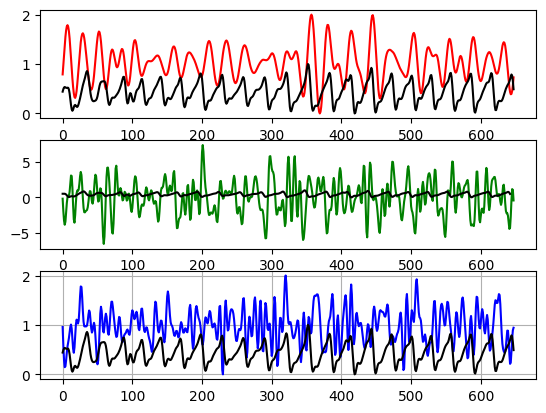

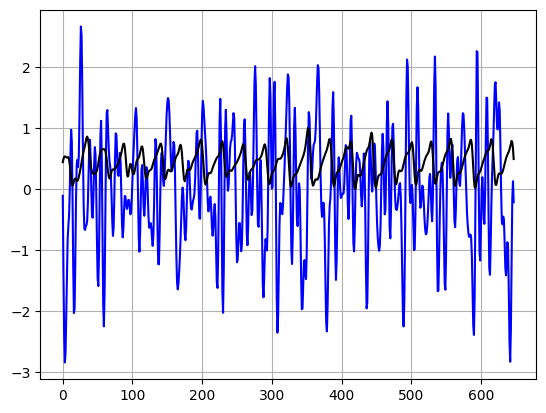

In [1070]:
plt.subplot(3, 1, 1)
plt.plot(normalize(R) * 2, 'r')
plt.plot(normalize(Spo2_filt), 'k')
#plt.plot(normalize(G), 'g')
plt.subplot(3, 1, 2)
plt.plot((G), 'g')
#plt.xlim(400, 660)
#plt.ylim(-1, 1)
plt.plot(normalize(Spo2_filt[5:]), 'k')

plt.subplot(3, 1, 3)
plt.plot(normalize(B) * 2, 'b')
plt.plot(normalize(Spo2_filt), 'k')

plt.grid()
plt.show()

plt.plot((B*0.4 + G*0.6)/2, 'b')
plt.plot(normalize(Spo2_filt), 'k')

plt.grid()
plt.show()

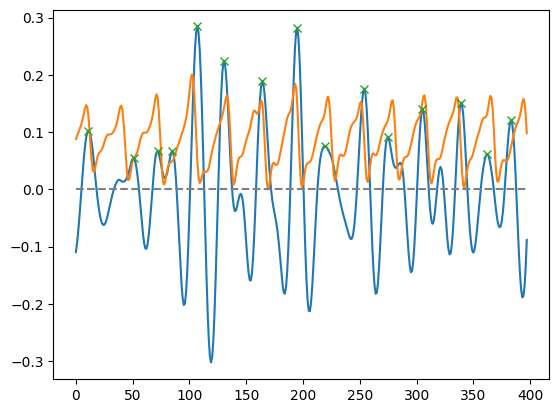

In [1110]:
from scipy.signal import find_peaks

#Combina = G * 0.5  + B * 0.3 + R * 0.1
C = R[250:]
peaks, _ = find_peaks(C, height=0.05)

plt.plot(C)
plt.plot(normalize(Spo2_filt[250:]) * 0.2)
plt.plot(peaks, C[peaks], "x")
plt.plot(np.zeros_like(C), "--", color="gray")

plt.show()

In [1111]:
f = np.diff(peaks)
f = f/30
f = f * 60
f.mean()

53.142857142857146

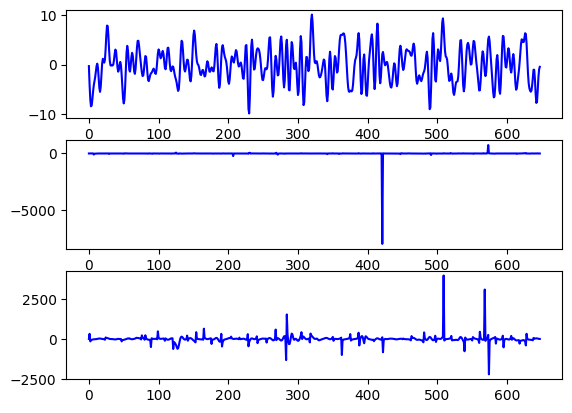

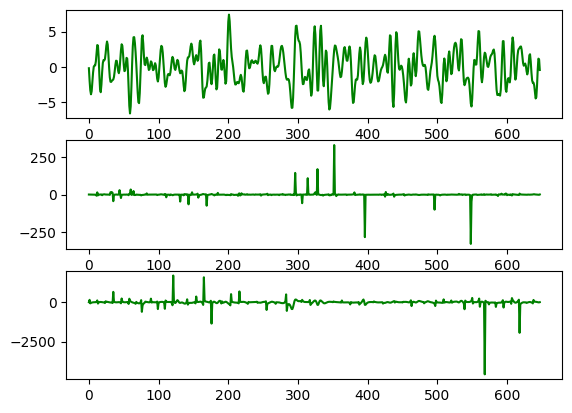

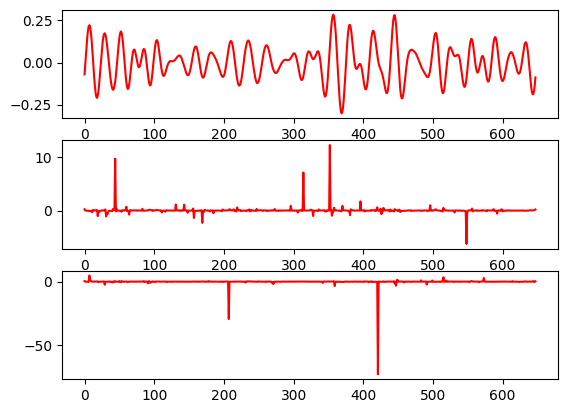

In [1109]:

B_G = B/G
B_R = B/R

G_B = G/B
G_R = G/R

R_B = R/B
R_G = R/G

plt.figure(0)
plt.subplot(3, 1, 1)
plt.plot(B, 'b')
plt.subplot(3, 1, 2)
plt.plot(B_G, 'b')
plt.subplot(3, 1, 3)
plt.plot(B_R, 'b')
plt.show()

plt.figure(1)
plt.subplot(3, 1, 1)
plt.plot(G, 'g')
plt.subplot(3, 1, 2)
plt.plot(G_B, 'g')
plt.subplot(3, 1, 3)
plt.plot(G_R, 'g')
plt.show()
    
plt.figure(2)
plt.subplot(3, 1, 1)
plt.plot(R, 'r')
plt.subplot(3, 1, 2)
plt.plot(R_B, 'r')
plt.subplot(3, 1, 3)
plt.plot(R_G, 'r')
plt.show()

In [1074]:
from scipy.signal import find_peaks
peaks, _ = find_peaks(Spo2_filt, height=200)

picos = np.zeros((len(Spo2_filt),))
for cont in range (2):
    picos[peaks - cont] = 1
picos[peaks] = 1 
for cont in range (2):
    picos[peaks + cont] = 1  

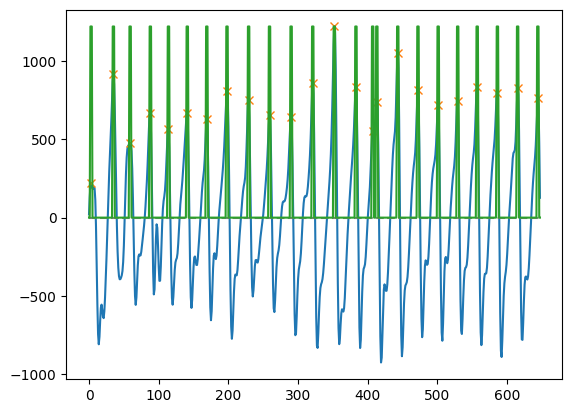

In [1075]:
plt.plot(Spo2_filt)
plt.plot(peaks, Spo2_filt[peaks], "x")
plt.plot(np.zeros_like(Spo2_filt), "--", color="gray")
plt.plot(picos * np.max(Spo2_filt))
#plt.xlim(100, 200)
plt.show()

In [1086]:
f = np.diff(peaks)
f = f/30
f = f*60
f.mean()

55.73913043478261

In [1087]:
def agrefar_cocientes():
    df["BLUE/RED"] = B_R[min:max]
    df["BLUE/GREEN"] = B_G[min:max]
    df["RED/BLUE"] = R_B[min:max]
    df["RED/GREEN)"] = R_G[min:max]
    df["GREEN/BLUE"] = G_B[min:max]
    df["GREEN/RED"] = G_R[min:max]
    return df

In [1088]:
data = []
df = pd.DataFrame(data)

min  = 150
max = 260

df["BLUE"] = (B[min:max])
df["RED"] = (R[min:max])
df["GREEN"] = (G[min:max])

#agrefar_cocientes()


df["SPO2"] = Spo2_filt[min:max]
df["label"] = picos[min:max]



df.head()

,BLUE,RED,GREEN,SPO2,label
0,5.885107,-0.068172,0.774208,-314.222389,0.0
1,6.887121,-0.056556,0.372820,-254.965860,0.0
2,6.075589,-0.039981,0.750587,-248.162855,0.0
3,4.080856,-0.019140,1.409581,-274.688139,0.0
4,1.990707,0.004632,1.672796,-302.010760,0.0


In [1089]:
df1 = df[df['label'] == 1]

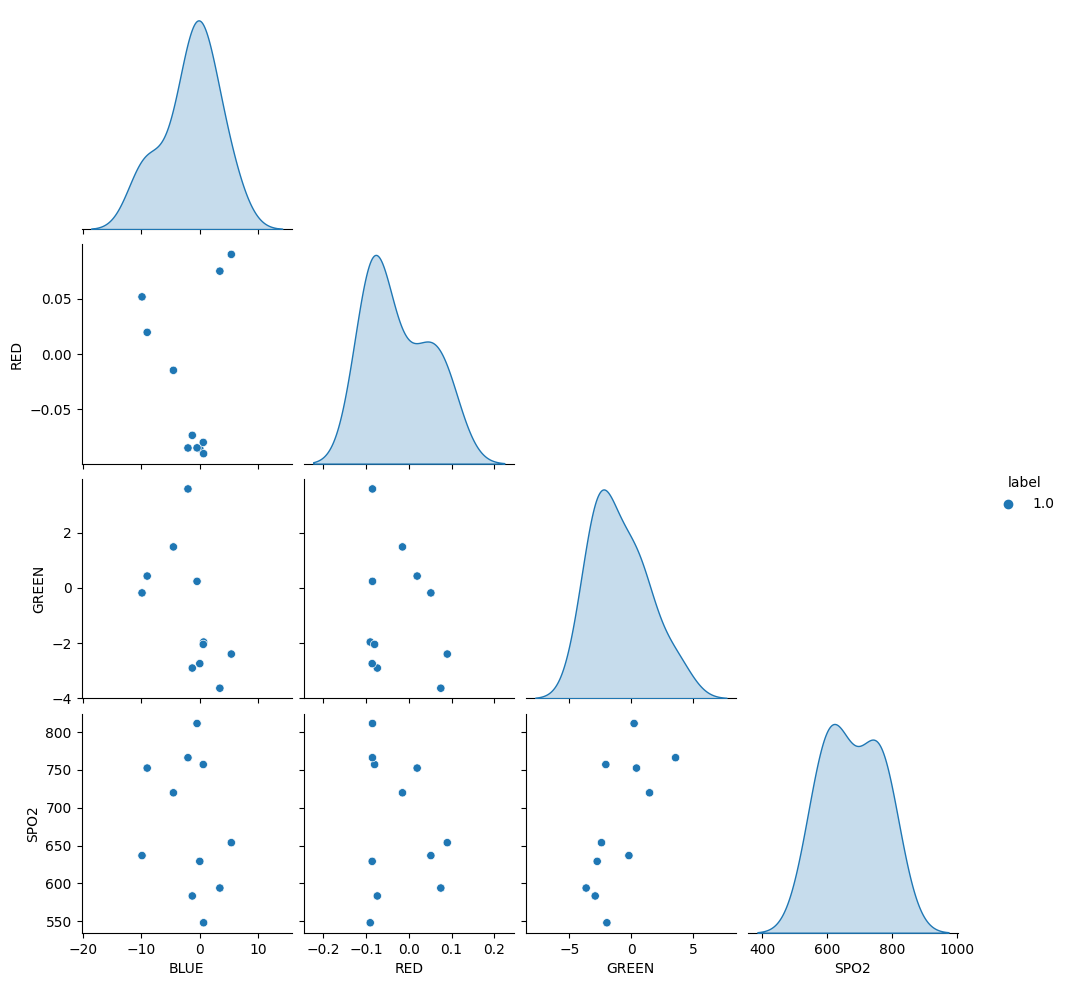

In [1090]:
sbn.pairplot(df1, hue='label', corner=True)

In [1091]:
df1.corr(method='pearson')

,BLUE,RED,GREEN,SPO2,label
BLUE,1.000000,-0.032186,-0.540056,-0.252273,NaN
RED,-0.032186,1.000000,-0.190414,-0.193732,NaN
GREEN,-0.540056,-0.190414,1.000000,0.675526,NaN
SPO2,-0.252273,-0.193732,0.675526,1.000000,NaN
label,NaN,NaN,NaN,NaN,NaN
